1. Importing the packages
2. Model the Class
- init
- fit
- predict
3. Train and Test model

In [31]:
import numpy as np 
import sklearn.datasets as ds 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [32]:
class SCM_C:
    def __init__(self, lr = 0.01, lambda_v = 0.001, iterations = 100):
        self.lr = lr
        self.lambda_v = lambda_v
        self.iterations = iterations
    

    def fit(self, X, y):
        """no of samples -> no of rows of X
           no of features -> columns of X"""
        n_samples, n_features = X.shape
        """Initialise weights with as many zeros as features"""
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.iterations):
            for i,x in enumerate(X):
                condition = y[i] * (np.dot(x, self.w) + self.b) >= 1
                if condition:
                    #regularization parameter -> 2 * lambra * w
                    self.w -= self.lr * (2 * self.lambda_v * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_v * self.w - np.dot(x,y[i]))
                    self.b -= self.lr * y[i]


    def predict(self, X):
        """y is in the range of [-1,1]"""
        y_pred = np.dot(X, self.w) + self.b
        """y_pred > 0 then positive, then +1
            y_pred < 0 then -ve so -1"""
        return np.sign(y_pred)




    

In [33]:
X,y = ds.make_blobs(n_samples=100, n_features=2,centers=2, cluster_std=2, random_state=1)
#print(y)

In [34]:
np.where(y == 0, -1, 1)

array([-1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
        1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1])

In [35]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [36]:
svc = SCM_C()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [37]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred)/len(y_true)



In [38]:
accuracy(y_test, y_pred)


0.35

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def plot_svm_decision_boundary(model, X, y, title="SVM Decision Boundary"):
    """
    Visualizes the SVM decision boundary and the data points.
    
    Parameters:
    - model: Your trained SVM model (SCM_C instance)
    - X: Feature matrix (2D array)
    - y: Target labels (1D array)
    - title: Title for the plot (string)
    """
    
    # Create a mesh grid to plot decision boundary
    # Step 1: Determine the min and max values for each feature
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #smallest x value point minus one and largest x value point plus one
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Step 2: Create a grid of points with h units apart
    h = 0.01  # step size in the mesh

    """np.arrange() takes values from x_min, x_max, and generated intermediate values with h steps
    meshgrid() takes the values given and creates a grid of values"""
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),  
                         np.arange(y_min, y_max, h))
    
    # Step 3: Predict the function value for the whole grid
    """the ravel() ffunction makes the grid flat, and the np.c_ {column stack} makes each (x1,y1), (x2,y2) -> (x1,x2),(y1,y2)
    reshape() makes the values back into the grid structure"""
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Step 4: Plot the contour and training examples
    plt.figure(figsize=(10, 6))
    
    # Plot the decision boundary and margins
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    
    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    
    # Highlight support vectors (approximation since we don't store them explicitly)
    # Note: For your custom SVM, this might not be exact since we don't track support vectors
    margin = 1 / np.sqrt(np.sum(model.w**2))
    decision_values = np.abs(np.dot(X, model.w) + model.b)
    sv_indices = np.where(decision_values <= 1 + 1e-5)[0]
    plt.scatter(X[sv_indices, 0], X[sv_indices, 1], 
                s=100, facecolors='none', edgecolors='k', 
                linewidths=1, label='Support Vectors')
    
    # Add labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.colorbar()
    plt.show()

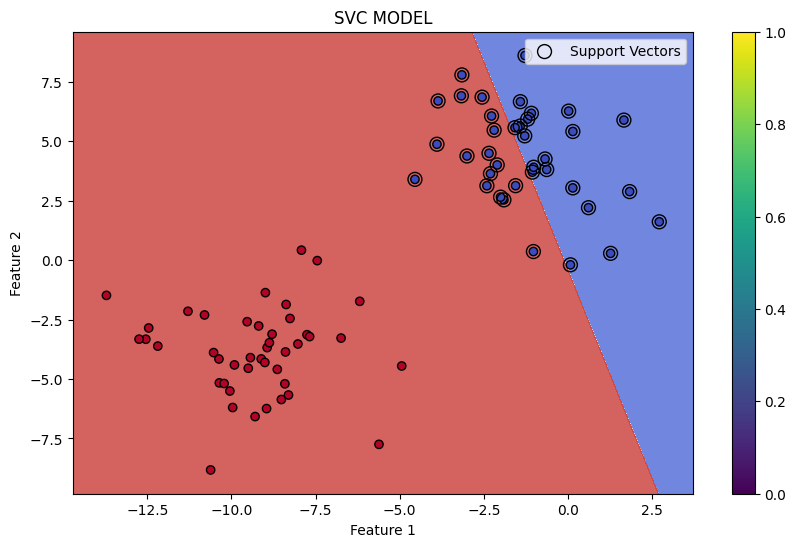

In [40]:
plot_svm_decision_boundary(svc,X_train, y_train, "SVC MODEL")

## linear SVM 
$$
\begin{aligned}
f(\mathbf{x}) = \mathbf{w}^T\mathbf{x} + b
\end{aligned}
$$
## margin boundaries
$$
\begin{aligned}
\mathbf{w}^T\mathbf{x} + b = \pm 1
\end{aligned}
$$
## geometric margin width
$$
\begin{aligned}
\gamma = \frac{1}{\|\mathbf{w}\|}
\end{aligned}
$$

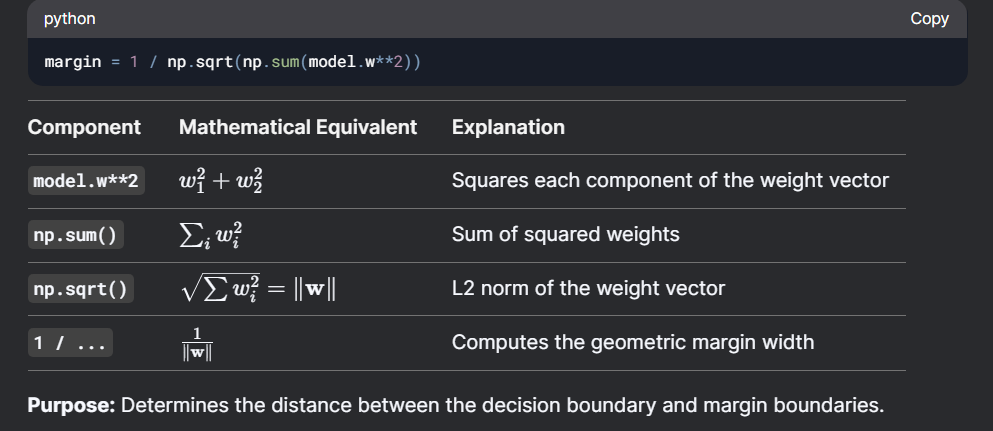

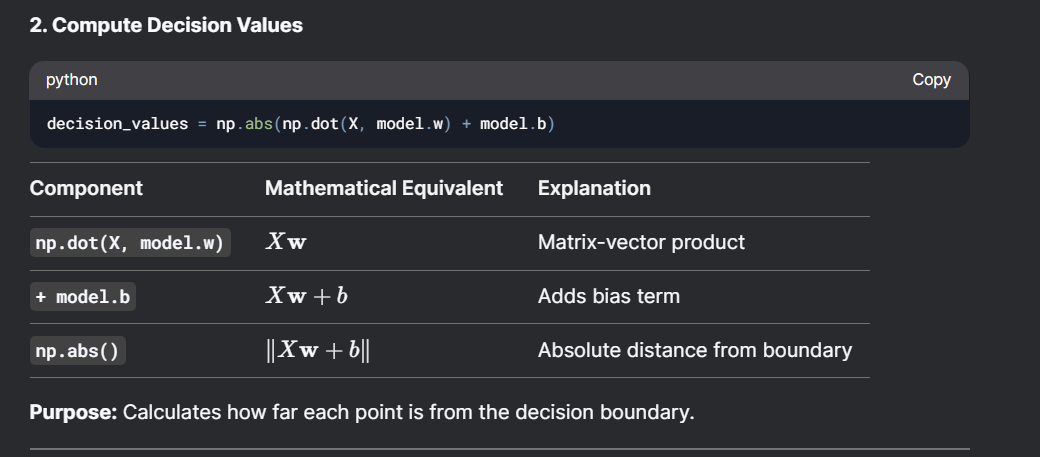

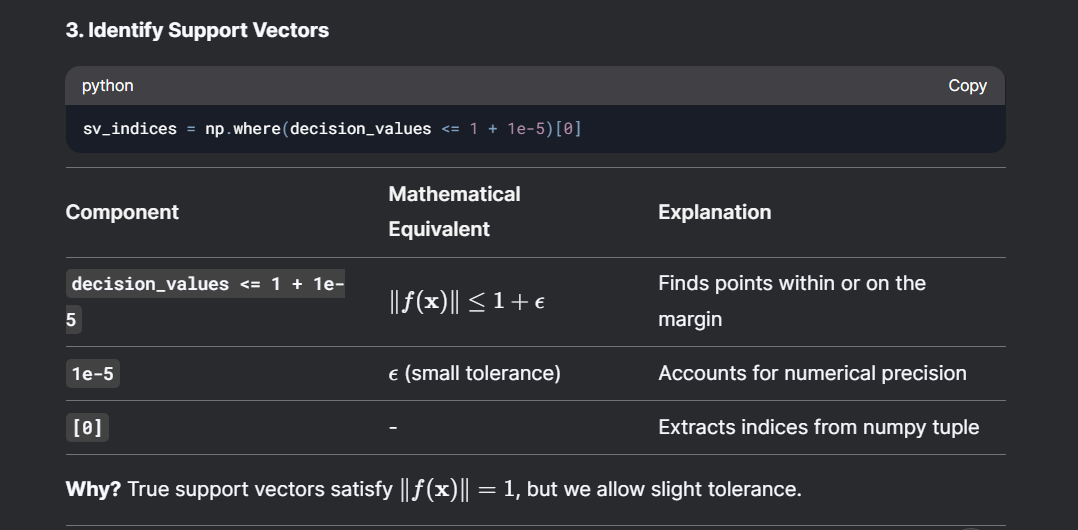